In [1]:
# do this first: install libary

# pip install mlxtend

# do this second: now import packages

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

In [3]:
# enter the data and view the head
# edit filepath first!

menu = pd.read_csv(r"C:\Users\karud\Documents\MSA_Fall2\DataMining\restaurantData.csv")
menu.head(9)

,order,type,orderNumber
0,Mashed Potatoes,Side,14
1,Filet Mignon,Meat,14
2,Blackstone Merlot,Wine,14
3,Mashed Potatoes,Side,22
4,Pork Tenderloin,Meat,22
5,Cantina Pinot Bianco,Wine,22
6,Mashed Potatoes,Side,27
7,Pork Tenderloin,Meat,27
8,Cantina Pinot Bianco,Wine,27


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

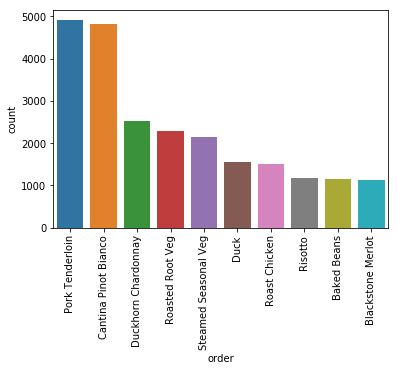

In [4]:
# visual of the most popular items

sns.countplot(x='order', data = menu, order= 
              menu['order'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)



In [5]:
# use MLxtend Library's Apiori Algorithm to extract frequent item sets
# the apriori function expects data in a pandas dataframe

# first step is to group the dataframe and display the count of items.

df = menu.groupby(['orderNumber','order']).size().reset_index(name='count')

basket = (df.groupby(['orderNumber','order'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('orderNumber'))


# then consolidate the items into 1 transaction per row with each product 1 hot coded

def encode_units(x):
    if x<= 0:
        return 0
    if x>= 1:
        return 1
    
basket_sets = basket.applymap(encode_units)

In [6]:
# now generate frequent item sets with minimum support 1%

frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

# conclusion: select pork tenderloin, steamed seasonal veggies, & cantina pinot bianco

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
182,"(Steamed Seasonal Veg, Cantina Pinot Bianco)",(Pork Tenderloin),0.130251,0.563125,0.123897,0.951220,1.689180,0.050550,8.955936
171,"(Risotto, Cantina Pinot Bianco)",(Pork Tenderloin),0.072244,0.563125,0.068361,0.946254,1.680362,0.027679,8.128521
40,(Cantina Pinot Bianco),(Pork Tenderloin),0.552889,0.563125,0.521591,0.943392,1.675280,0.210245,7.717576
176,"(Roasted Root Veg, Cantina Pinot Bianco)",(Pork Tenderloin),0.141546,0.563125,0.133427,0.942643,1.673950,0.053719,7.616819
102,"(Baked Beans, Cantina Pinot Bianco)",(Pork Tenderloin),0.073067,0.563125,0.068832,0.942029,1.672859,0.027686,7.536092
165,"(Mashed Potatoes, Pork Tenderloin)",(Cantina Pinot Bianco),0.070008,0.552889,0.065655,0.937815,1.696210,0.026948,7.190035
103,"(Baked Beans, Pork Tenderloin)",(Cantina Pinot Bianco),0.073420,0.552889,0.068832,0.937500,1.695640,0.028238,7.153783
145,"(Cantina Pinot Bianco, Caesar Salad)",(Pork Tenderloin),0.065772,0.563125,0.061654,0.937388,1.664618,0.024616,6.977517
164,"(Mashed Potatoes, Cantina Pinot Bianco)",(Pork Tenderloin),0.070244,0.563125,0.065655,0.934673,1.659797,0.026099,6.687547
170,"(Risotto, Pork Tenderloin)",(Cantina Pinot Bianco),0.073420,0.552889,0.068361,0.931090,1.684046,0.027768,6.488315
